<a href="https://colab.research.google.com/github/DanielACordero/Machine-Learning/blob/main/Unsupervised_machine_learning_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

pd.options.display.max_columns = None

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('https://raw.githubusercontent.com/DanielACordero/Machine-Learning/main/df_audio_features.csv')
df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [112]:
df.rename(columns={'name                                                                                                                                                                             ':'name',
                   'artist                                          ':'artist',
                   'danceability ':'danceability',
                   'energy   ':'energy',
                   'key ':'key',
                   'loudness ':'loudness',
                   'mode ':'mode',
                   'speechiness ':'speechiness',
                   'acousticness ':'acousticness',
                   'instrumentalness ':'instrumentalness',
                   'liveness ':'liveness',
                   'valence ':'valence',
                   'tempo   ':'tempo',
                   'type ':'type',
                   'duration_ms ':'duration_ms',
                   'time_signature ':'time_signature',
                   'id                     ':'id',
                   'html':'html'},inplace=True)

In [113]:
df.drop

<bound method DataFrame.drop of                                                    name  \
0     Se Eu Quiser Falar Com Deus                   ...   
1     Saudade De Bahia                              ...   
2     Canta Canta, Minha Gente                      ...   
3     Mulher Eu Sei                                 ...   
4     Rosa Morena                                   ...   
...                                                 ...   
5230  1812 Festival Overture, Op. 49: 1812 Overture,...   
5231  Winter Fragments pour ensemble instrumental, s...   
5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5234  Ravel: Boléro, M. 81                          ...   

                                                artist  danceability   energy  \
0     Gilberto Gil                                            0.6580  0.25900   
1     Antônio Carlos Jobim                                    0.7420  0.39900   
2     Martinho D

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   key               5235 non-null   int64  
 5   loudness          5235 non-null   float64
 6   mode              5235 non-null   int64  
 7   speechiness       5235 non-null   float64
 8   acousticness      5235 non-null   float64
 9   instrumentalness  5235 non-null   float64
 10  liveness          5235 non-null   float64
 11  valence           5235 non-null   float64
 12  tempo             5235 non-null   float64
 13  type              5235 non-null   object 
 14  duration_ms       5235 non-null   int64  
 15  time_signature    5235 non-null   int64  
 16  id                5235 non-null   object 


In [115]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5.235000e+03,5235.000000
mean,0.509503,0.653565,5.254441,-9.338098,0.646227,0.083178,0.290043,0.257337,0.185354,0.443596,118.721407,2.479112e+05,3.902961
std,0.218041,0.288335,3.571559,6.294850,0.478185,0.071193,0.355985,0.370686,0.149410,0.277725,28.568463,1.356330e+05,0.420324
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.276000e+04,0.000000
25%,0.309000,0.479000,2.000000,-11.337000,0.000000,0.039000,0.002450,0.000001,0.092500,0.196000,96.174000,1.899910e+05,4.000000
50%,0.539000,0.738000,5.000000,-7.338000,1.000000,0.055800,0.095400,0.001880,0.125000,0.417000,119.180000,2.246670e+05,4.000000
75%,0.688000,0.893000,8.000000,-5.264000,1.000000,0.098650,0.565500,0.643000,0.237000,0.677000,134.019000,2.717200e+05,4.000000
max,0.967000,1.000000,11.000000,1.342000,1.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000,3.815787e+06,5.000000


In [116]:
df.describe(include="O")

,name,artist,type,id,html
count,5235,5235,5235,5235,5235
unique,5011,2176,1,5171,5171
top,Scared to Be Lonely ...,Death,,23L5CiUhw2jV1OIMwthR3S,https://open.spotify.com/track/23L5CiUhw2jV1OI...
freq,4,29,5235,3,3


In [175]:
# fig, (ax1, ax2) = ≈(ncols=2, sharex=True, figsize=(15,10));
# sns.regplot(x=df['danceability'], y=df['valence'], ax=ax1);
# sns.regplot(x=df['energy'], y=df['tempo'], ax=ax2);
#. plt.tight_layout()

In [118]:
#fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
#sns.regplot(x=df['danceability'], y=df['valence'], ax=ax1)
#sns.regplot(x=df['energy'], y=df['duration_ms'], ax=ax2)
#plt.tight_layout()

In [119]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [120]:
df_cluster = df.copy()
df_cluster = df_cluster.iloc[:]

In [121]:
X = df_cluster.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values

In [122]:
print(X.shape)
df_cluster.head()

(5235, 14)


,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [123]:
#wcss = []
#for i in range (1,11):
 #  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
  #  kmeans.fit(X)
   # wcss.append(kmeans.inertia_)

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [125]:
df.drop('type', axis=1, inplace=True)

In [126]:
df.drop('name', axis=1, inplace=True)

In [127]:
df.drop('duration_ms', axis=1, inplace=True)

In [128]:
df.drop('mode', axis=1, inplace=True)

In [129]:
df.drop('time_signature', axis=1, inplace=True)

In [130]:
df.drop('id', axis=1, inplace=True)

In [131]:
df.drop('key', axis=1, inplace=True)

In [132]:
df.drop('artist', axis=1, inplace=True)

In [133]:
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,html
0,0.658,0.2590,-13.141,0.0705,0.694,0.000059,0.975,0.306,110.376,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,0.742,0.3990,-12.646,0.0346,0.217,0.000002,0.107,0.693,125.039,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,0.851,0.7300,-11.048,0.3470,0.453,0.000063,0.124,0.905,93.698,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,0.705,0.0502,-18.115,0.0471,0.879,0.000041,0.386,0.524,106.802,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,0.651,0.1190,-19.807,0.0380,0.916,0.000343,0.104,0.402,120.941,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [134]:
df.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.040491,0.358328,0.036121,-0.111151,-0.573800,-0.032534,0.680097,-0.009585
energy,0.040491,1.000000,0.786860,0.303940,-0.850469,-0.169923,0.170642,0.159101,0.211617
loudness,0.358328,0.786860,1.000000,0.233609,-0.697709,-0.471786,0.134788,0.335754,0.213228
speechiness,0.036121,0.303940,0.233609,1.000000,-0.265754,-0.064754,0.081963,-0.011395,0.064255
acousticness,-0.111151,-0.850469,-0.697709,-0.265754,1.000000,0.194941,-0.103144,-0.130646,-0.187994
instrumentalness,-0.573800,-0.169923,-0.471786,-0.064754,0.194941,1.000000,-0.051664,-0.500584,-0.071945
liveness,-0.032534,0.170642,0.134788,0.081963,-0.103144,-0.051664,1.000000,0.007272,0.036370
valence,0.680097,0.159101,0.335754,-0.011395,-0.130646,-0.500584,0.007272,1.000000,0.098783
tempo,-0.009585,0.211617,0.213228,0.064255,-0.187994,-0.071945,0.036370,0.098783,1.000000


In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [136]:
df.drop('html', axis=1, inplace=True)

In [137]:
scaler.fit(df.drop('energy',axis=1))

StandardScaler()

In [138]:
from seaborn.axisgrid import jointplot
jointplot

<function seaborn.axisgrid.jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)>

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [140]:
scaler.fit(df.drop('energy',axis=1))

StandardScaler()

In [141]:
scaled_features = scaler.transform(df.drop('energy',axis=1))

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   loudness          5235 non-null   float64
 3   speechiness       5235 non-null   float64
 4   acousticness      5235 non-null   float64
 5   instrumentalness  5235 non-null   float64
 6   liveness          5235 non-null   float64
 7   valence           5235 non-null   float64
 8   tempo             5235 non-null   float64
dtypes: float64(9)
memory usage: 368.2 KB


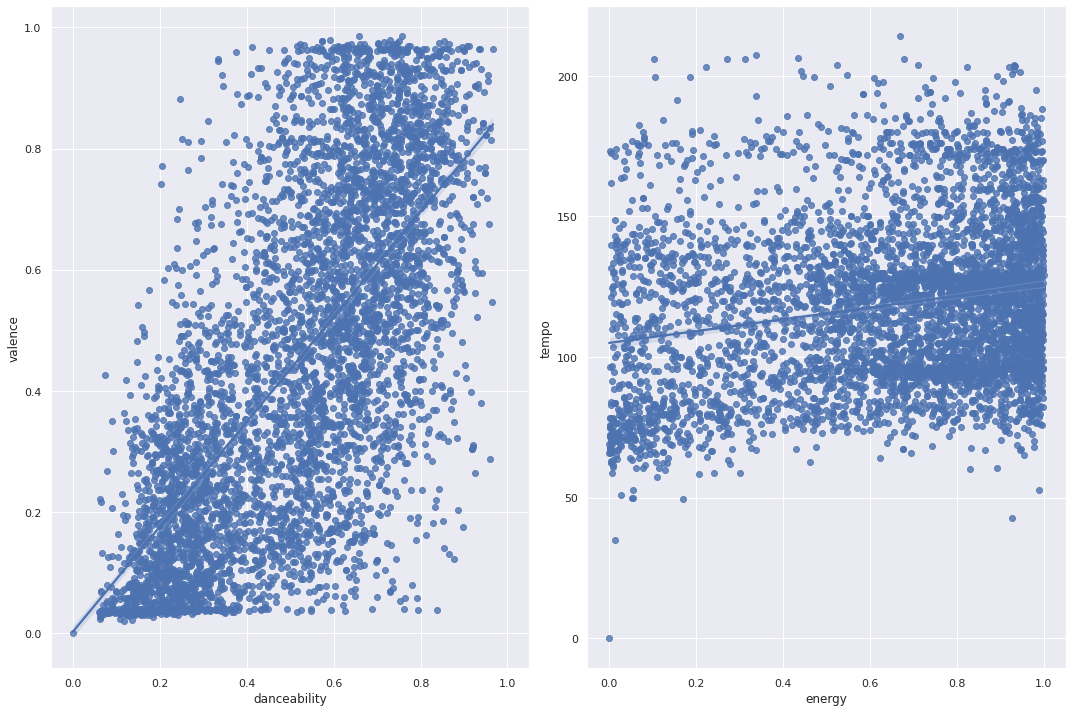

In [150]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=df['danceability'], y=df['valence'], ax=ax1);
sns.regplot(x=df['energy'], y=df['tempo'], ax=ax2);
plt.tight_layout()

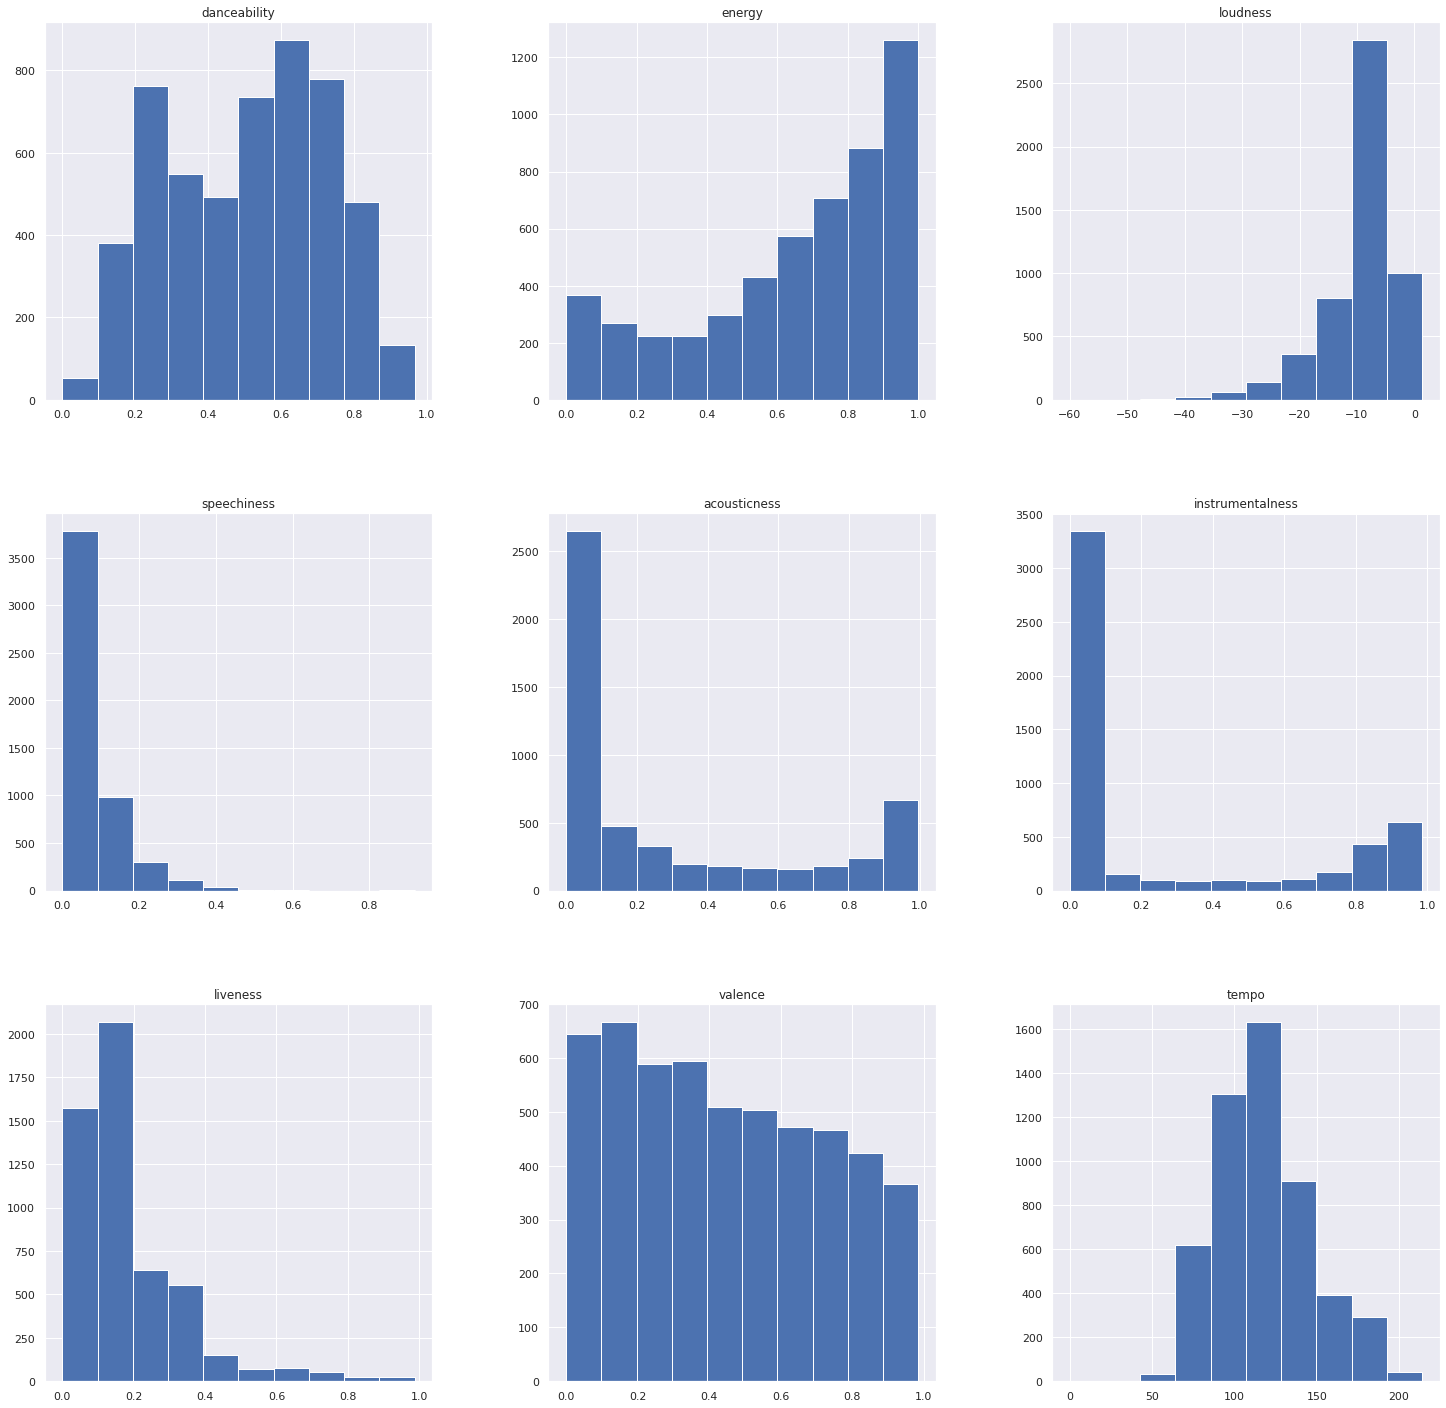

In [151]:
df.hist(figsize=(25,25));

In [153]:
X = df.iloc[:,[3,4]].values

In [154]:
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

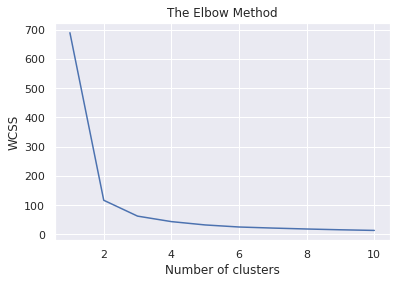

In [155]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [161]:
kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

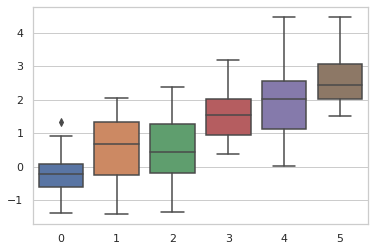

In [166]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

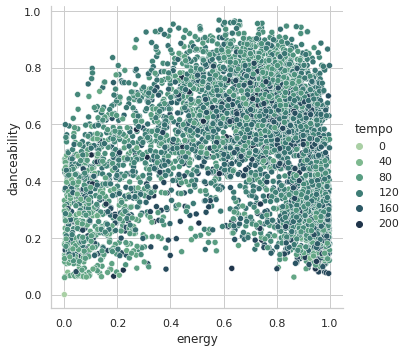

In [170]:
sns.relplot(x="energy", y="danceability", hue="tempo", palette="ch:r=-.5,l=.75", data=df);

In [187]:
X= 'danceability'
Y= df ['energy' ]

In [190]:
from sklearn.cluster import KMeans

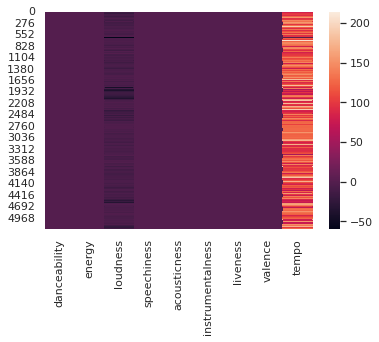

In [192]:
sns.heatmap(df)

In [196]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

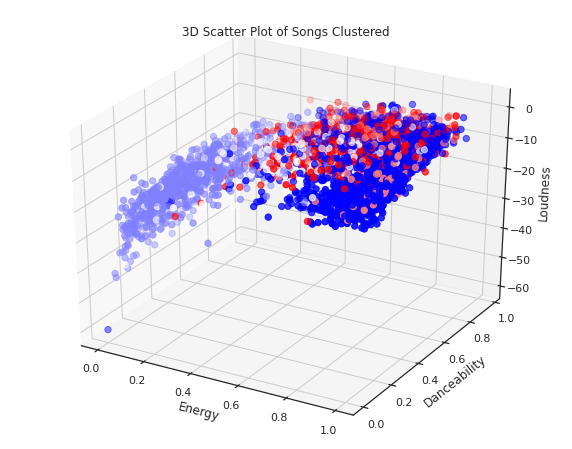

In [197]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [198]:
df.groupby(['kmeans']).mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
kmeans,,,,,,,,,
0,0.493136,0.823393,-6.838272,0.072522,0.027355,0.270755,0.193027,0.432078,122.771068
1,0.391169,0.185171,-18.853448,0.048188,0.925947,0.526020,0.148881,0.268440,107.428554
2,0.575461,0.528340,-9.783598,0.069623,0.609176,0.087531,0.203511,0.578893,119.448054
3,0.522427,0.826902,-6.054073,0.248343,0.044840,0.170410,0.208599,0.408097,121.617478
4,0.656344,0.667690,-7.279874,0.074069,0.277010,0.049335,0.179288,0.625096,117.334712


In [199]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [201]:
cluster_0.to_csv("https://raw.githubusercontent.com/DanielACordero/Machine-Learning/main/df_audio_features.csv",index=False)
cluster_1.to_csv("https://raw.githubusercontent.com/DanielACordero/Machine-Learning/main/df_audio_features.csv",index=False)
df.to_csv("https://raw.githubusercontent.com/DanielACordero/Machine-Learning/main/df_audio_features.csv",index=False)

In [206]:
wcss

[689.8076619095684,
 117.00713722978655,
 62.775330202540225,
 44.00173026788558,
 32.61604670268459,
 25.581524942090056,
 21.91214599796345,
 18.753261358164277,
 16.05307806764342,
 13.897428512687537]

In [210]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()